# What we used: Quandl: US vs. EUR Exchange Rate

In this notebook, we'll take a look at data set , available on [Quantopian](https://www.quantopian.com/data). This dataset spans from 1999 through the current day. It contains the daily exchange rates for the US Dollar (USD) vs. the European EURO (EUR) We access this data via the API provided by [Quandl](https://www.quandl.com). [More details](https://www.quandl.com/data/CURRFX/USDEUR-Currency-Exchange-Rates-USD-vs-EUR) on this dataset can be found on Quandl's website.

# Case Study 3 : Data Science in Financial Data

# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

# The Problem:

All investors experience the same difficulty in decision making.Trying to select the "right" stock 
to invest in (i.e. the one that will yield the highest profit, or minimize damage).
In making that decision many methods have been established to overcome the challenge. Foreign exchange
rates are no different. When investing in a currency, the value of the currency is everything and comparison against
other currencies is the "end-all, be-all" of investment.

Our team is looking to develop an Investor's Decision Support Tool. A program focused on comparing 
two currencies on the foreign exchange market, so as to provide recommendations for investment opportunities. 
Using modern-day economics, we plan to implement rules to the tool to analyze signals for day traders to increase their
portfolio's net yield.


# Data Collection/Processing: 

In [75]:
# import the dataset
from quantopian.interactive.data.quandl import currfx_usdeur

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# sorting the data by date
currfx_usdeur.sort('asof_date')

,rate,high__est_,low__est_,asof_date,timestamp
0,0.941019,0.95269,0.92949,1999-09-06,1999-09-07 03:42:27.563126
1,0.945500,0.95636,0.93476,1999-09-07,1999-09-08 03:42:27.563126
2,0.944376,0.95588,0.93301,1999-09-08,1999-09-09 03:42:27.563126
3,0.943697,0.95412,0.93339,1999-09-09,1999-09-10 03:42:27.563126
4,0.948008,0.00000,0.00000,1999-09-10,1999-09-11 03:42:27.563126
5,0.959838,0.97143,0.94838,1999-09-13,1999-09-14 03:42:27.563126
6,0.964873,0.97623,0.95365,1999-09-14,1999-09-15 03:42:27.563126
7,0.965378,0.97708,0.95382,1999-09-15,1999-09-16 03:42:27.563126
8,0.963142,0.97393,0.95248,1999-09-16,1999-09-17 03:42:27.563126
9,0.961971,0.00000,0.00000,1999-09-17,1999-09-18 03:42:27.563126


# Data Exploration: Exploring the Dataset

**plot the weekly returns of a set of stocks of your choice** 

In [77]:
currfx_usdeur = odo(currfx_usdeur, pd.DataFrame)
currfx_usdeur = currfx_usdeur[['asof_date','rate']]
currfx_usdeur = currfx_usdeur.set_index('asof_date')
currfx_usdeur = currfx_usdeur['rate']

Time series plot of the data

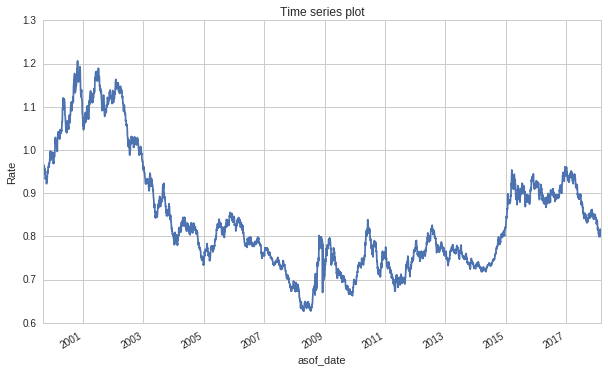

In [81]:
ax = currfx_usdeur.plot(figsize=(10,6))
ax.set_ylabel('Rate')
ax.set_title('Time series plot')
plt.show()

In [82]:
import numpy as np
idx = pd.date_range('1999-01-01', '2018-12-31')
currfx_usdeur.index = pd.DatetimeIndex(currfx_usdeur.index)
currfx_usdeur = currfx_usdeur.reindex(idx, fill_value=np.nan)
currfx_usdeur.interpolate(method='linear', inplace=True)
currfx_usdeur_1 = currfx_usdeur.replace(np.nan, 0.941019)
print("Missing values imputed through interpolation")

Missing values imputed through interpolation


Components - Trend, Seasonal, Irregularity plot

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(currfx_usdeur_1, model='multiplicative',freq=100)
result.plot()
plt.show()
result = seasonal_decompose(currfx_usdeur_1, model='multiplicative',freq=1)
result.plot()
plt.show()

Year wise plot for the data

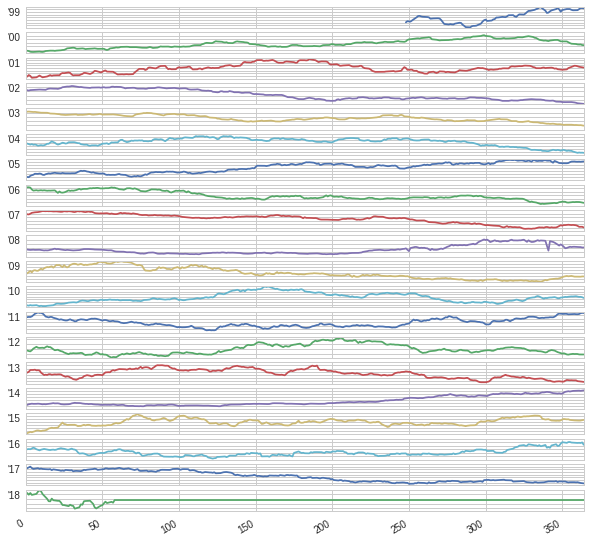

In [84]:
import numpy as np
from pandas import TimeGrouper
groups = currfx_usdeur.groupby(TimeGrouper('A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values[0:365]
ax = years.plot(subplots=True, legend=False, figsize=(10,10))
for i in range(20):
    ax[i].set_yticklabels([])
    ax[i].set_ylabel("'"+str(i+1999)[-2:],rotation=0,fontsize=10)
plt.show()

Distribution plot of the data

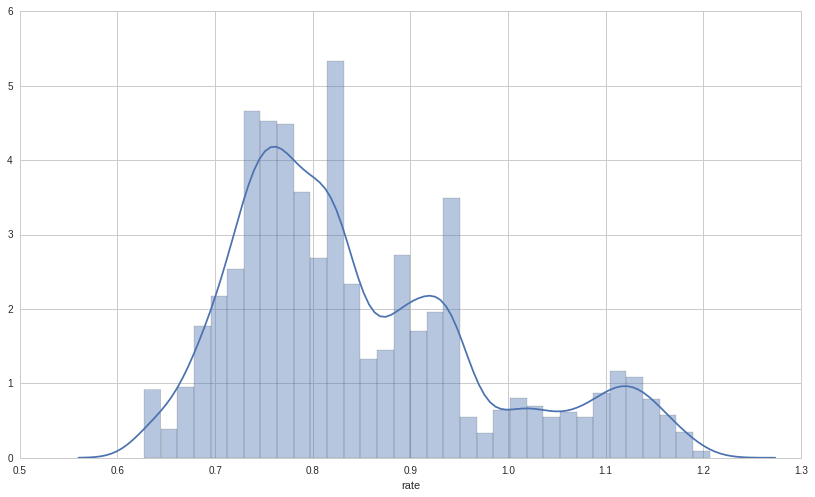

In [85]:
import seaborn as sns
sns.distplot(currfx_usdeur_1);

Yearly Box-Whisker plot to check the Yearly Quartiles

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  import sys


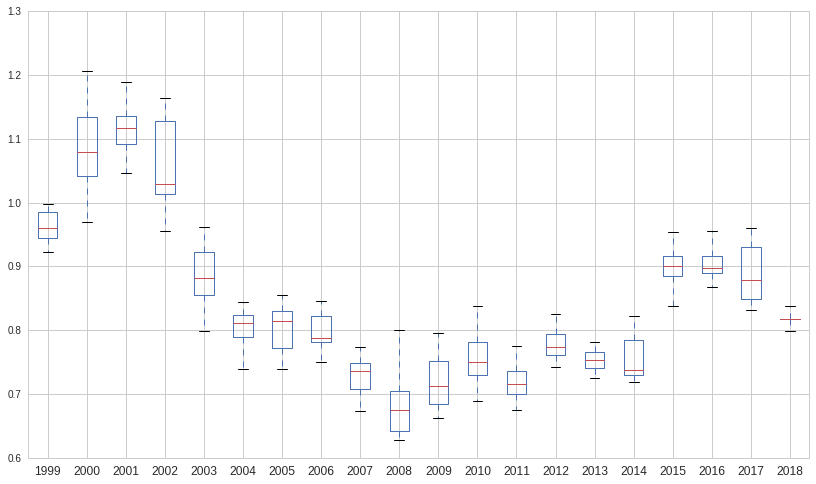

In [86]:
import numpy as np
from pandas import TimeGrouper
groups = currfx_usdeur.groupby(TimeGrouper('A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values[0:364]
ax = years.boxplot(figsize=(15,5))
plt.show()

Monthly Box-whisker plot

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  import sys


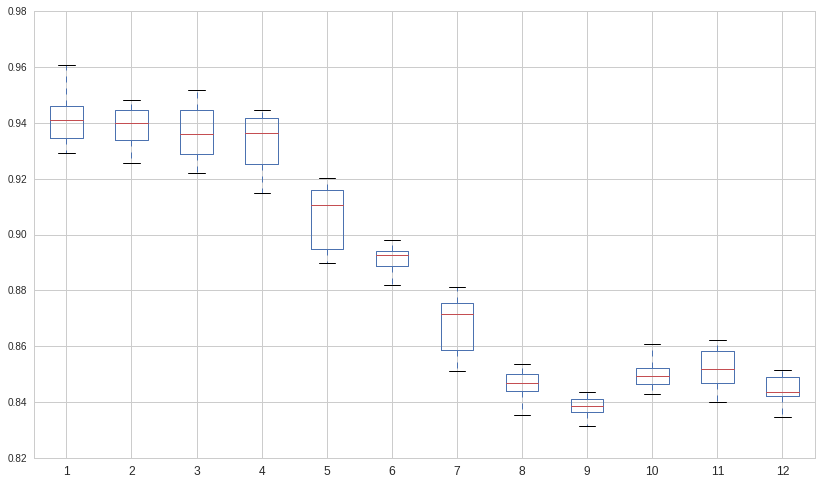

In [87]:
from pandas import concat
one_year = currfx_usdeur['2017']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot(figsize=(15,5))
plt.show()

Yearly Heatmap (X-days,Y-year)

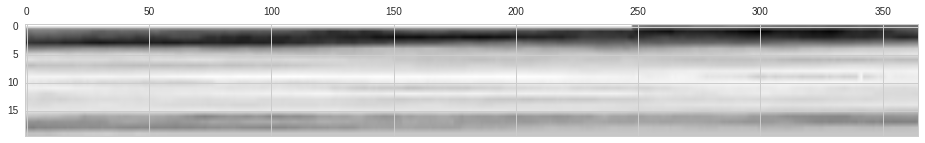

In [88]:
groups = currfx_usdeur.groupby(TimeGrouper('A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values[0:365]
years = years.T
ax = plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

Monthly Heatmap (X-month,Y-days)

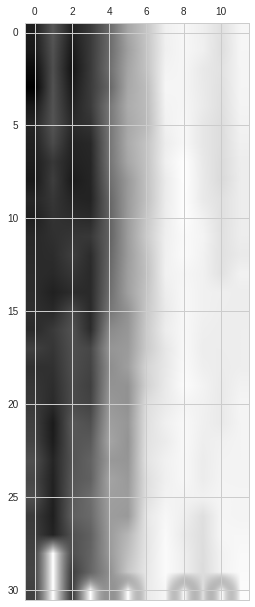

In [89]:
one_year = currfx_usdeur['2017']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

Lag plots - To check if lags can explain the current rate
We can see a high positive correlation between lags

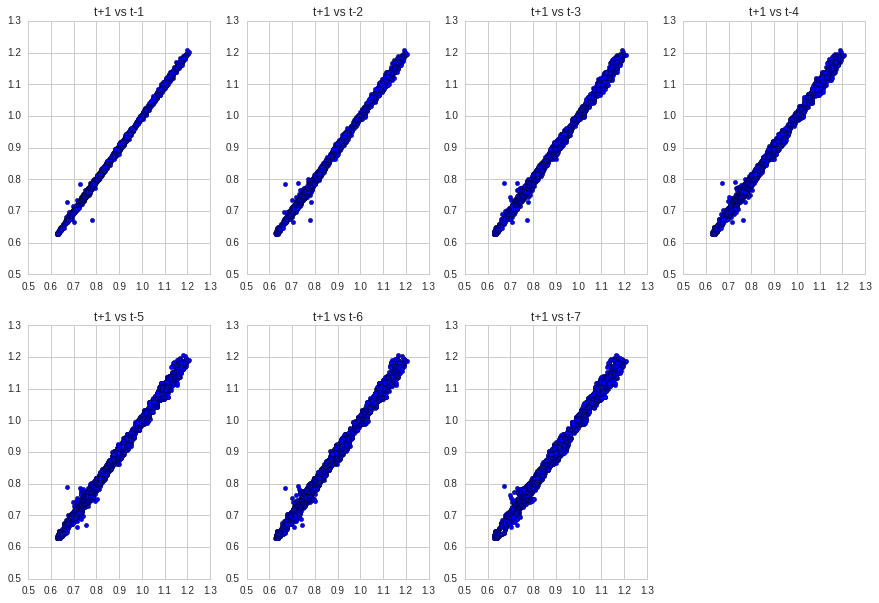

In [90]:
values = pd.DataFrame(currfx_usdeur.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1,figsize=(15, 10))
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

Distribution plot as violin plot

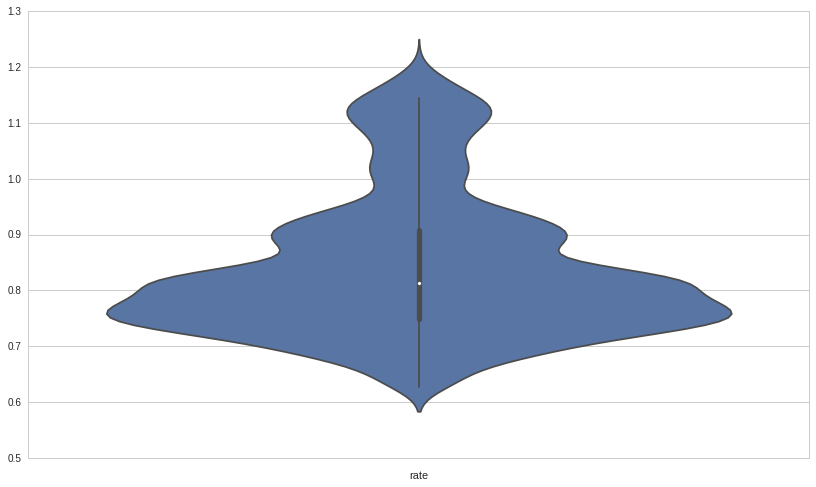

In [93]:
import seaborn as sns
ax = sns.violinplot(data=currfx_usdeur)
ax.set_xlabel('rate')
ax.set_xticklabels([])
plt.show()

Autocorrelation plot - ARIMA (p value)

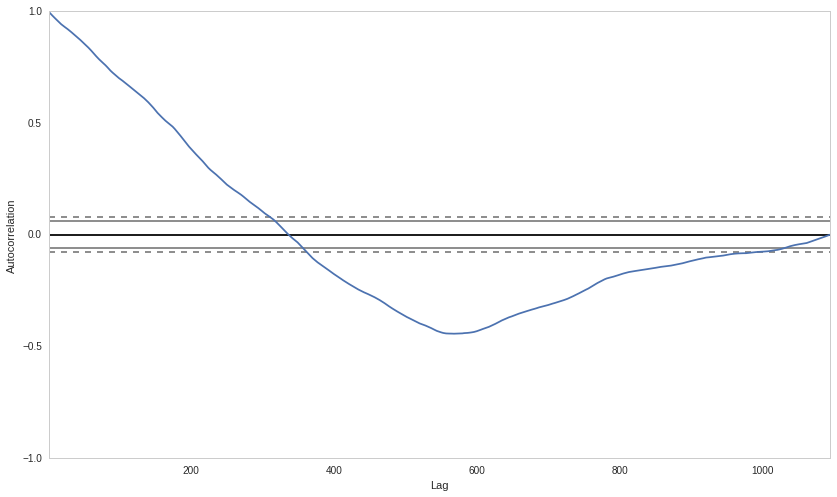

In [94]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(currfx_usdeur[-1095:])
plt.show()

In [95]:
from quantopian.interactive.data.quandl import currfx_usdeur

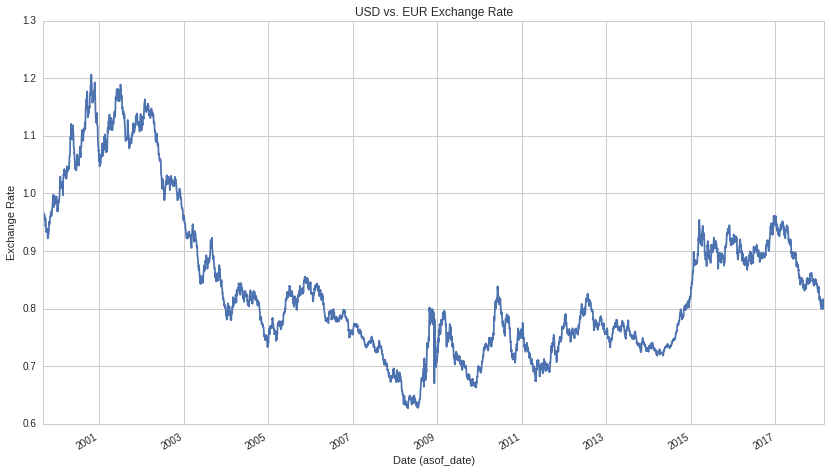

In [96]:
#plot the data by date (x-axis) and the rate(y-axis)
usdeur_df = odo(currfx_usdeur, pd.DataFrame)
usdeur_df.plot(x='asof_date', y='rate')
plt.xlabel("Date (asof_date)")
plt.ylabel("Exchange Rate")
plt.title("USD vs. EUR Exchange Rate")
plt.legend().set_visible(False)


In [97]:
import numpy as np
import pandas as pd
#now pull the data for the rate and give index as the date
data = usdeur_df['rate']
data=pd.DataFrame(data)
data=data.set_index(pd.DatetimeIndex(usdeur_df['asof_date']))
print(data.head())

                rate
2016-02-23  0.905564
2016-02-24  0.908011
2016-02-25  0.907719
2016-02-26  0.908080
2016-02-29  0.913724


In [0]:
data.index

DatetimeIndex(['2016-02-23', '2016-02-24', '2016-02-25', '2016-02-26',
               '2016-02-29', '2016-03-01', '2016-03-02', '2016-03-03',
               '2016-03-04', '2016-03-07',
               ...
               '2018-02-15', '2018-02-16', '2018-02-19', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', length=5457, freq=None)

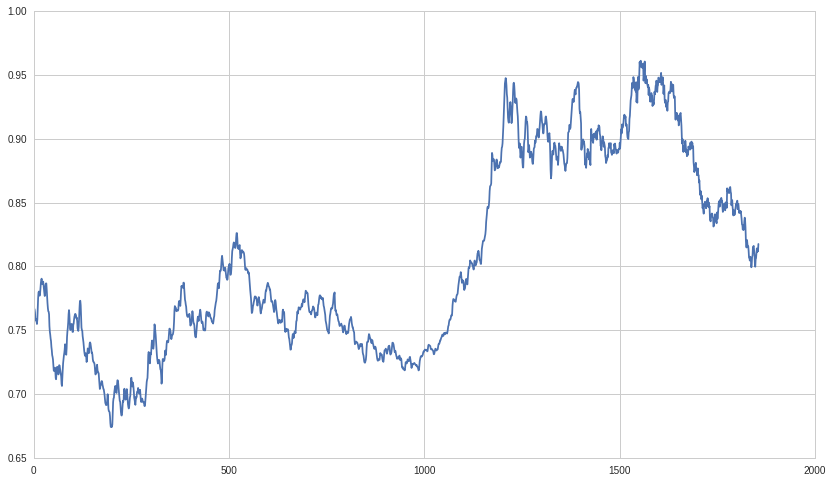

In [0]:
#here we will pull the data into a series and then pull out training and testing, 
#where 66% is for training and we use the rest for testing
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = data
X = series.values

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
plt.plot(test)

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

# The Solution:

Our solution uses US to Canada currency exchange time-series data to extrapolate the forecast. After which we apply
Bollinger Bands to the data visually to help conceptualize the right time to buy and sell the two currencies.
Bollinger Bands are a principle of economic thought in which +/- 1 standard deviation of the running average
can be overlayed on the data. These bands can be used to determine the prime time to buy and sell a stock;
but if the trend of the stock is not being considered, then only half the picture is available. This is why our tool
takes into account the forecast. The end result being a forecast that utilizes Bollinger Bands to recommend the 
best times to buy and sell.








Write codes to implement the solution in python:

In [0]:
# now we need to loop over all the values in the test set applying the model( learnred within using training data)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    #p=2, d=1, q=0
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    pred_value = output[0]
    predictions.append(pred_value)
    obs = test[t]
    history.append(obs)
	#print('predicted=%f, expected=%f' % (pred_value, obs))
# calculate the MSE so we can evaluate our model
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.00002


In [0]:
# bollinger bands code
# need a loop to loop over every pred 2 std and produce and graph on above
# needs to be for every 20 day increment of data points using the rolling average
test=pd.DataFrame(test)
predictions=pd.DataFrame(predictions)
import pandas as pd
import matplotlib.pyplot as plt
rolling_mean = test.rolling(window=20).mean()
rolling_std = test.rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 1)
lower_band = rolling_mean - (rolling_std * 1)

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.

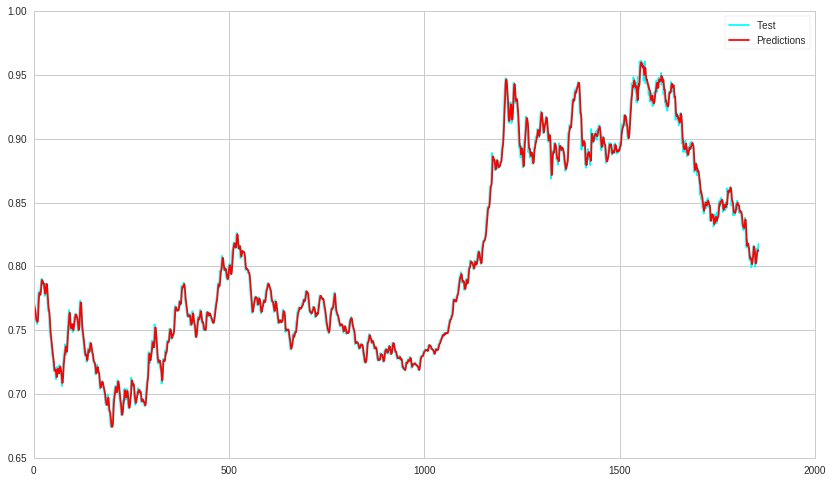

In [0]:
# plot the test data
pyplot.plot(test, color='cyan')
# plot the predictions
pyplot.plot(predictions, color='red')
plt.gca().legend(('Test','Predictions'))

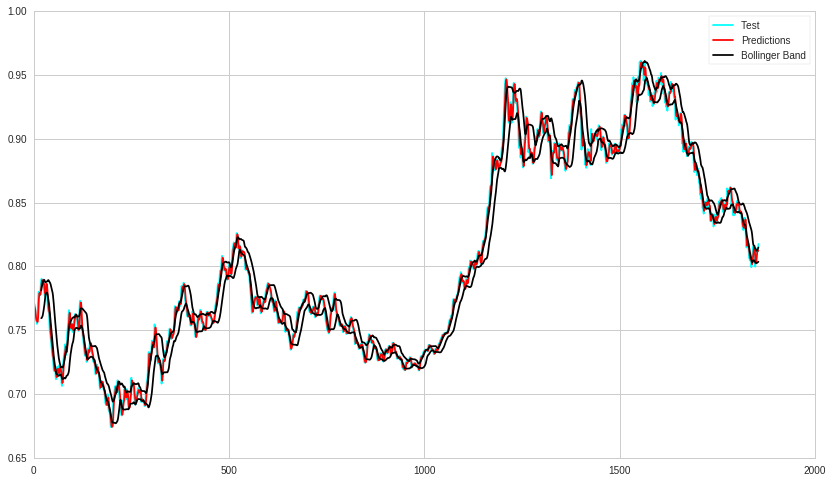

In [0]:
#ploting the test, predicitons and bollinger bands on the one graph
import pandas as pd
import matplotlib.pyplot as plt
pyplot.plot(test, color='cyan')
pyplot.plot(predictions, color='red')
x_axis = test.index.get_level_values(0)
pyplot.plot(upper_band,color='black')
pyplot.plot(lower_band, color='black')
plt.gca().legend(("Test","Predictions",'Bollinger Band'))
pyplot.show()


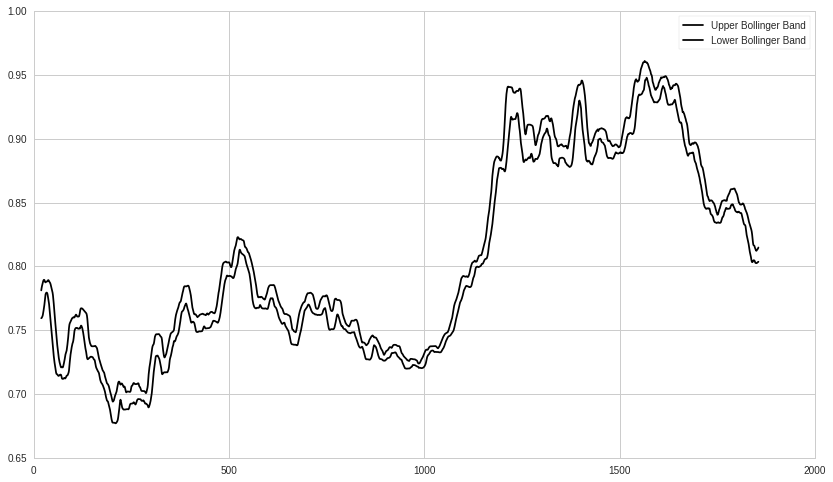

In [0]:
# to look at just the bolinger bands alone
pyplot.plot(upper_band,color='black')
pyplot.plot(lower_band, color='black')
plt.gca().legend(('Upper Bollinger Band','Lower Bollinger Band'))

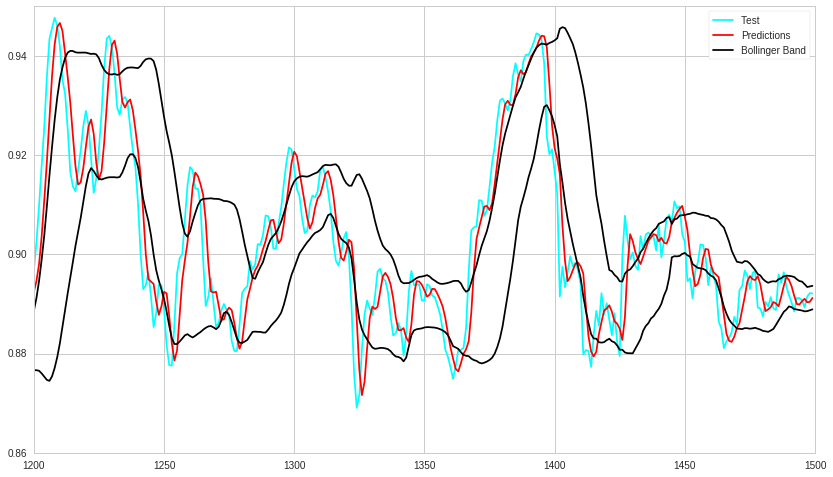

In [0]:
# this will pull and just look at an example between time periods 1200-1500
# in this set we can better see the bollinger bands, and how the values go above the bands
#which tend to indicate the exchange rate is about to plumet, which we see to be true
import pandas as pd
import matplotlib.pyplot as plt
test1=test[1200:1500]
predictions1=predictions[1200:1500]
upper_band1=upper_band[1200:1500]
lower_band1=lower_band[1200:1500]
pyplot.plot(test1, color='cyan')
pyplot.plot(predictions1, color='red')
pyplot.plot(upper_band1,color='black')
pyplot.plot(lower_band1, color='black')
plt.gca().legend(("Test","Predictions",'Bollinger Band'))
pyplot.show()

In [0]:
# now forecast next 7 days 
forecast = model_fit.forecast(steps=7)[0]

In [0]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
days_in_year = 365
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for x in forecast:
	print('Day %d: %f' % (day,x))
	history.append(x)
	day += 1

Day 1: 0.812526
Day 2: 0.812594
Day 3: 0.812388
Day 4: 0.812471
Day 5: 0.812435
Day 6: 0.812406
Day 7: 0.812400


5457
[[ 0.905564  ]
 [ 0.908011  ]
 [ 0.907719  ]
 ..., 
 [ 0.81124997]
 [ 0.81386   ]
 [ 0.81198001]]


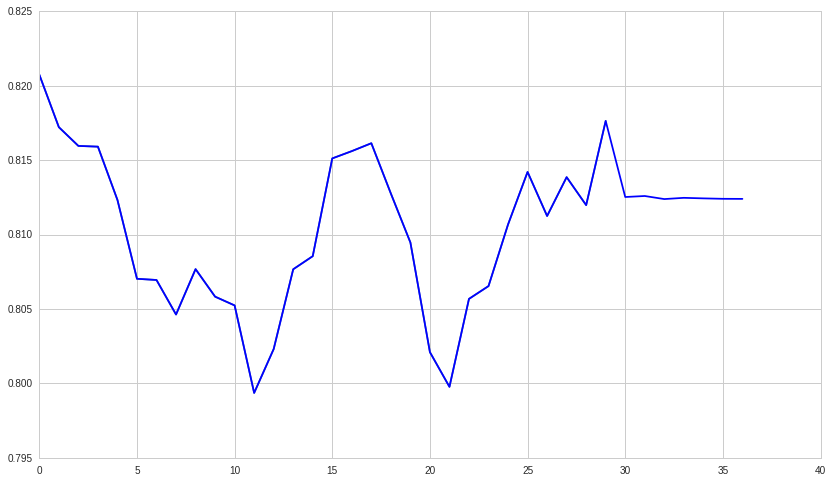

In [0]:
#pyplot.plot(test, color='blue')
#pyplot.plot(predictions, color='pink')
#pyplot.plot(upper_band,color='grey')
#pyplot.plot(lower_band, color='grey')
print(len(X))
forecast=pd.DataFrame(forecast)
#plot the forecasted with the last 30 days and then the 7 new ones
pyplot.plot(history[5427:],color='blue')
#pyplot.show()
print(X[:-1])


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


**How to submit:**

        Please submit through Canvas, in the Assignment "Case Study 3".
        
**Note: Each team only needs to submit one submission in Canvas**